In [79]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy

import matplotlib.pyplot as plt

In [98]:
dataset = pd.read_csv(r'C:\Users\Sony\Documents\PythonEstatistica_Aplicacao\consulta21022279.txt', sep=';', encoding='latin1')

dataset 

,Competência concessão,Espécie,CID,CID.1,Despacho,Dt Nascimento,Sexo.,Clientela,Mun Resid,Vínculo dependentes,Forma Filiação,UF,Qt SM RMI,Ramo Atividade,Dt DCB,Dt DDB,Dt DIB,Acordo Internacional,Classificador PA
0,janeiro/2018,Aposentadoria por Tempo de Contribuição,000000,Zerados,Concessao Normal,14/08/1965,Masculino,Urbano,02003-AL-Arapiraca,Não Informado,Autônomo,Alagoas,"1,247",Comerciario,00/00/0000,03/01/2018,01/11/2017,Não,Sem Pensâo Alimentícia
1,janeiro/2018,Aposentadoria Invalidez Previdenciária,M17,M17 Gonartrose,Concessao Normal,09/12/1951,Feminino,Urbano,02003-AL-Arapiraca,Não Informado,Autônomo,Alagoas,"1,000",Comerciario,00/00/0000,02/01/2018,05/12/2017,Não,Sem Pensâo Alimentícia
2,janeiro/2018,Auxílio Doenca Previdenciário,K429,K42.9 Hernia Umbilical s/Obstrucao ou Gangren,Concessao Normal,12/03/1989,Masculino,Urbano,02003-AL-Arapiraca,Não Informado,Empregado,Alagoas,"1,000",Comerciario,04/01/2018,05/01/2018,04/07/2017,Não,Sem Pensâo Alimentícia
3,janeiro/2018,Auxílio Doenca Previdenciário,M519,M51.9 Transt Ne de Disco Intervertebral,Concessao Normal,25/05/1962,Masculino,Rural,02044-AL-Major Isidoro,Não Informado,Segurado Especial,Alagoas,"1,000",Rural,05/06/2018,04/01/2018,28/11/2017,Não,Sem Pensâo Alimentícia
4,janeiro/2018,Auxílio Doenca Previdenciário,K409,K40.9 Hernia Inguinal Unilat Ne s/Obstr Gangr,Concessao Normal,09/06/1987,Masculino,Urbano,02092-AL-Traipu,Filho,Empregado,Alagoas,"1,000",Comerciario,30/08/2017,04/01/2018,05/07/2017,Não,Sem Pensâo Alimentícia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5164754,dezembro/2018,Auxílio Doenca Previdenciário,M545,M54.5 Dor Lombar Baixa,Conc. Decorrente Revisao Administrativa,06/01/1990,Masculino,Urbano,28033-TO-Formoso do Araguaia,Filho,Empregado,Tocantins,"1,470",Comerciario,27/11/2018,31/12/2018,01/11/2018,Não,Sem Pensâo Alimentícia
5164755,dezembro/2018,Amparo Social ao Idoso,000000,Zerados,Concessao Normal,01/10/1953,Feminino,Urbano,28011-TO-Arraias,Não Informado,Desempregado,Tocantins,"1,000",Irrelevante,00/00/0000,31/12/2018,03/10/2018,Não,Sem Pensâo Alimentícia
5164756,dezembro/2018,Auxílio Doenca Previdenciário,S826,S82.6 Frat do Maleolo Lateral,Conc. Base Artigo 27 Inciso Ii do Rbps,25/07/1979,Feminino,Urbano,28008-TO-Araguaína,Não Informado,Empregado,Tocantins,"1,389",Comerciario,31/01/2019,31/12/2018,21/11/2018,Não,Sem Pensâo Alimentícia
5164757,dezembro/2018,Auxílio Doenca Previdenciário,C931,C93.1 Leucemia Monocitica Cronica,Concessao Normal,15/09/1952,Masculino,Urbano,28021-TO-Colinas do Tocantins,Não Informado,Empregado,Tocantins,"2,864",Servidor Publico,13/01/2019,31/12/2018,30/11/2018,Não,Sem Pensâo Alimentícia


In [80]:
import pandas as pd
from scipy.stats import ttest_ind

# Carregar o dataset
dataset = pd.read_csv(r'C:\Users\Sony\Documents\PythonEstatistica_Aplicacao\consulta21022279.txt', sep=';', encoding='latin1')

# Filtrar os dados
datasetFiltrado = dataset[['Sexo.', 'Qt SM RMI']]
datasetMulheres = datasetFiltrado[datasetFiltrado['Sexo.'] == 'Feminino']
datasetHomens = datasetFiltrado[datasetFiltrado['Sexo.'] == 'Masculino']

# Converter os valores de 'Qt SM RMI' para numérico
datasetMulheres['Qt SM RMI'] = datasetMulheres['Qt SM RMI'].str.replace(',', '.').astype(float)
datasetHomens['Qt SM RMI'] = datasetHomens['Qt SM RMI'].str.replace(',', '.').astype(float)




C:\Users\Sony\AppData\Local\Temp\ipykernel_9996\738339138.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetMulheres['Qt SM RMI'] = datasetMulheres['Qt SM RMI'].str.replace(',', '.').astype(float)
C:\Users\Sony\AppData\Local\Temp\ipykernel_9996\738339138.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetHomens['Qt SM RMI'] = datasetHomens['Qt SM RMI'].str.replace(',', '.').astype(float)


In [103]:
mulheres_array = datasetMulheres['Qt SM RMI'].to_numpy()
homens_array = datasetHomens['Qt SM RMI'].to_numpy()

len(mulheres_array), len(homens_array)

(2927104, 2237655)

# H0: Não há uma diferença significativa entre a quantidade de salários mínimos recebidos por homens e mulheres.
# H1: Há uma diferença significativa entre a quantidade de salários mínimos recebidos por homens e mulheres.

In [104]:

from scipy.stats import ttest_ind


# 100 AMOSTRA DE CADA GRUPO
amostraMulheres = datasetMulheres.sample(n=100, random_state=1)
amostraHomens = datasetHomens.sample(n=100, random_state=1)

mulheres_array = amostraMulheres['Qt SM RMI'].to_numpy()
homens_array = amostraHomens['Qt SM RMI'].to_numpy()

# Realizar o teste t
testeT, valorP = ttest_ind(mulheres_array, homens_array)
# Exibir os resultados
print(f"\nTeste T: {testeT}")
print(f"Valor P: {valorP}")

#resultado 
if valorP < 0.05:
    print("Rejeitamos a hipótese nula e aceitamos a hipótese alternativa: \nH1 --> Há uma diferença significativa entre os salários mínimos recebidos por homens e mulheres. :)")
else:
    print("Aceita-se Hipótese nula e rejeitamos hipótese alternativa:\nH0 --> Não há uma diferença significativa entre os salários mínimos recebidos por homens e mulheres. :)")


Teste T: -1.9881273501938945
Valor P: 0.048175295186039545
Rejeitamos a hipótese nula e aceitamos a hipótese alternativa: 
H1 --> Há uma diferença significativa entre os salários mínimos recebidos por homens e mulheres. :)


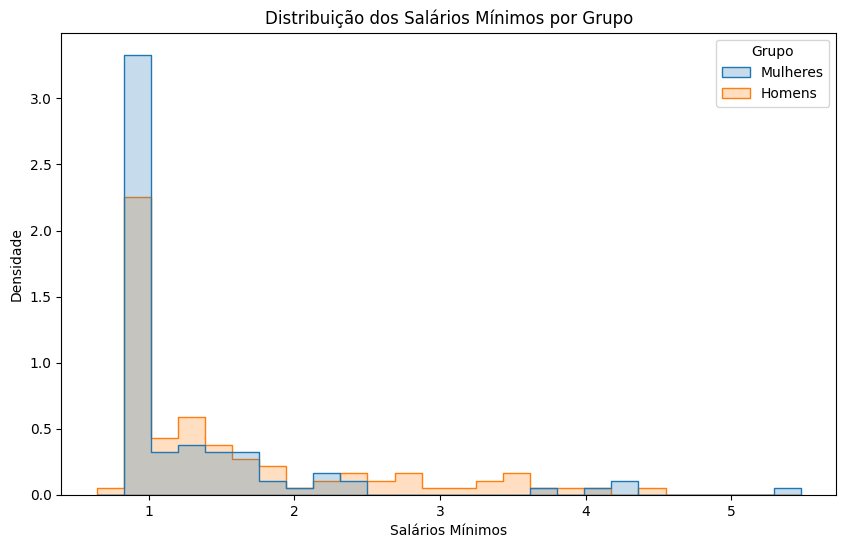

In [105]:
data = pd.DataFrame({
    'Salários Mínimos': np.concatenate([mulheres_array, homens_array]),
    'Grupo': ['Mulheres'] * len(mulheres_array) + ['Homens'] * len(homens_array)
})

# Plotar a distribuição dos salários mínimos para homens e mulheres
plt.figure(figsize=(10, 6))
sns.histplot(data, x='Salários Mínimos', hue='Grupo', element='step', stat='density', common_norm=False)
plt.title('Distribuição dos Salários Mínimos por Grupo')
plt.xlabel('Salários Mínimos')
plt.ylabel('Densidade')
plt.show()

In [102]:
dataset 

,Competência concessão,Espécie,CID,CID.1,Despacho,Dt Nascimento,Sexo.,Clientela,Mun Resid,Vínculo dependentes,Forma Filiação,UF,Qt SM RMI,Ramo Atividade,Dt DCB,Dt DDB,Dt DIB,Acordo Internacional,Classificador PA
0,janeiro/2018,Aposentadoria por Tempo de Contribuição,000000,Zerados,Concessao Normal,14/08/1965,Masculino,Urbano,02003-AL-Arapiraca,Não Informado,Autônomo,Alagoas,"1,247",Comerciario,00/00/0000,03/01/2018,01/11/2017,Não,Sem Pensâo Alimentícia
1,janeiro/2018,Aposentadoria Invalidez Previdenciária,M17,M17 Gonartrose,Concessao Normal,09/12/1951,Feminino,Urbano,02003-AL-Arapiraca,Não Informado,Autônomo,Alagoas,"1,000",Comerciario,00/00/0000,02/01/2018,05/12/2017,Não,Sem Pensâo Alimentícia
2,janeiro/2018,Auxílio Doenca Previdenciário,K429,K42.9 Hernia Umbilical s/Obstrucao ou Gangren,Concessao Normal,12/03/1989,Masculino,Urbano,02003-AL-Arapiraca,Não Informado,Empregado,Alagoas,"1,000",Comerciario,04/01/2018,05/01/2018,04/07/2017,Não,Sem Pensâo Alimentícia
3,janeiro/2018,Auxílio Doenca Previdenciário,M519,M51.9 Transt Ne de Disco Intervertebral,Concessao Normal,25/05/1962,Masculino,Rural,02044-AL-Major Isidoro,Não Informado,Segurado Especial,Alagoas,"1,000",Rural,05/06/2018,04/01/2018,28/11/2017,Não,Sem Pensâo Alimentícia
4,janeiro/2018,Auxílio Doenca Previdenciário,K409,K40.9 Hernia Inguinal Unilat Ne s/Obstr Gangr,Concessao Normal,09/06/1987,Masculino,Urbano,02092-AL-Traipu,Filho,Empregado,Alagoas,"1,000",Comerciario,30/08/2017,04/01/2018,05/07/2017,Não,Sem Pensâo Alimentícia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5164754,dezembro/2018,Auxílio Doenca Previdenciário,M545,M54.5 Dor Lombar Baixa,Conc. Decorrente Revisao Administrativa,06/01/1990,Masculino,Urbano,28033-TO-Formoso do Araguaia,Filho,Empregado,Tocantins,"1,470",Comerciario,27/11/2018,31/12/2018,01/11/2018,Não,Sem Pensâo Alimentícia
5164755,dezembro/2018,Amparo Social ao Idoso,000000,Zerados,Concessao Normal,01/10/1953,Feminino,Urbano,28011-TO-Arraias,Não Informado,Desempregado,Tocantins,"1,000",Irrelevante,00/00/0000,31/12/2018,03/10/2018,Não,Sem Pensâo Alimentícia
5164756,dezembro/2018,Auxílio Doenca Previdenciário,S826,S82.6 Frat do Maleolo Lateral,Conc. Base Artigo 27 Inciso Ii do Rbps,25/07/1979,Feminino,Urbano,28008-TO-Araguaína,Não Informado,Empregado,Tocantins,"1,389",Comerciario,31/01/2019,31/12/2018,21/11/2018,Não,Sem Pensâo Alimentícia
5164757,dezembro/2018,Auxílio Doenca Previdenciário,C931,C93.1 Leucemia Monocitica Cronica,Concessao Normal,15/09/1952,Masculino,Urbano,28021-TO-Colinas do Tocantins,Não Informado,Empregado,Tocantins,"2,864",Servidor Publico,13/01/2019,31/12/2018,30/11/2018,Não,Sem Pensâo Alimentícia
